<a href="https://colab.research.google.com/github/venkatasai-world/Automatic_birthday_wisher/blob/main/day72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [9]:
df=pd.read_csv("/content/QueryResults.csv",names=['DATE','TAG','POSTS'])

In [10]:
df.head()

,DATE,TAG,POSTS
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


In [11]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [13]:
df.shape

(1992, 3)

In [14]:
df.isna()

,DATE,TAG,POSTS
0,False,False,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1987,False,False,False
1988,False,False,False
1989,False,False,False
1990,False,False,False


In [15]:
df.count()

,0
DATE,1992
TAG,1992
POSTS,1991


In [16]:
df['TAG'].max()

'swift'

In [20]:
cf=df[['DATE','TAG']]

In [21]:
cf.head()

,DATE,TAG
0,m,TagName
1,2008-07-01 00:00:00,c#
2,2008-08-01 00:00:00,assembly
3,2008-08-01 00:00:00,javascript
4,2008-08-01 00:00:00,c


In [23]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
TagName,m,0.0
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852.0
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042.0
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530.0
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210.0
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212.0
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499.0
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403.0
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510.0


In [24]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
TagName,1,0
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144


In [25]:
df['DATE'][1]

'2008-07-01 00:00:00'

In [27]:
type(df['DATE'][1])

str

In [31]:
print(pd.to_datetime(df['DATE'][1]))

2008-07-01 00:00:00


In [33]:
type(pd.to_datetime(df['DATE'][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


/tmp/ipython-input-2967002165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


In [41]:
df.head()

,DATE,TAG,POSTS
0,NaT,TagName,NaN
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0


In [42]:
reshaped_df=df.pivot(index='DATE',columns='TAG',values='POSTS')

In [43]:
reshaped_df.head()

TAG,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-01,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,NaN,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,NaN,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN


In [44]:
import matplotlib.pyplot as plt

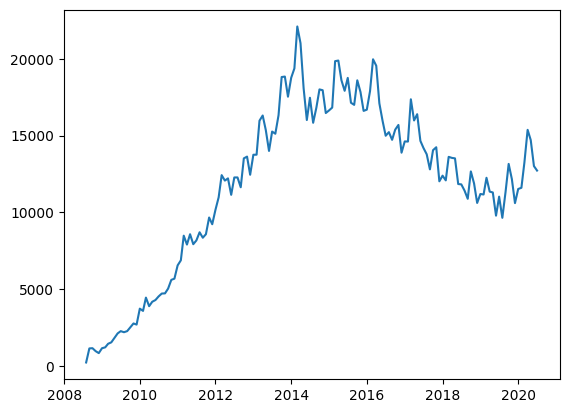

In [45]:
plt.plot(reshaped_df.index, reshaped_df['java'])

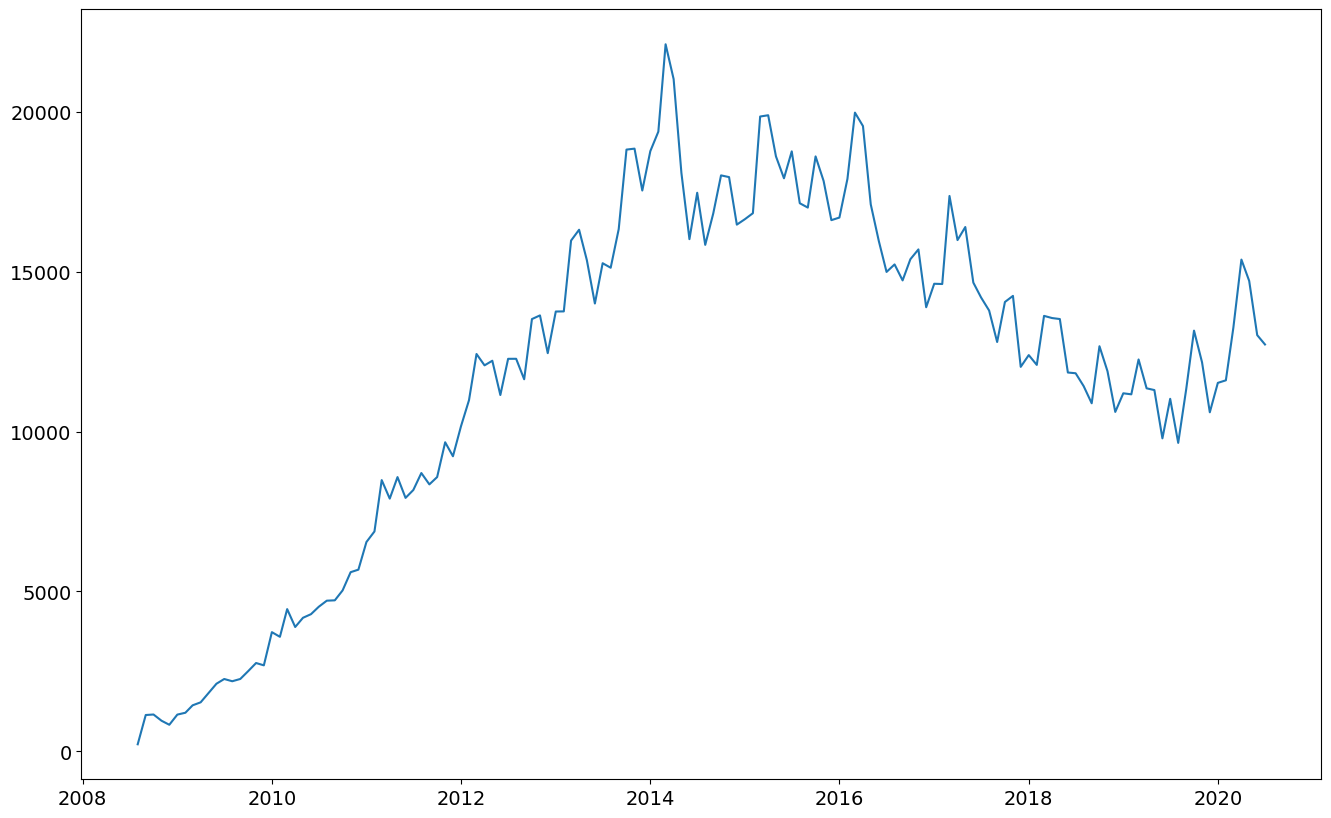

In [47]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df['java'])

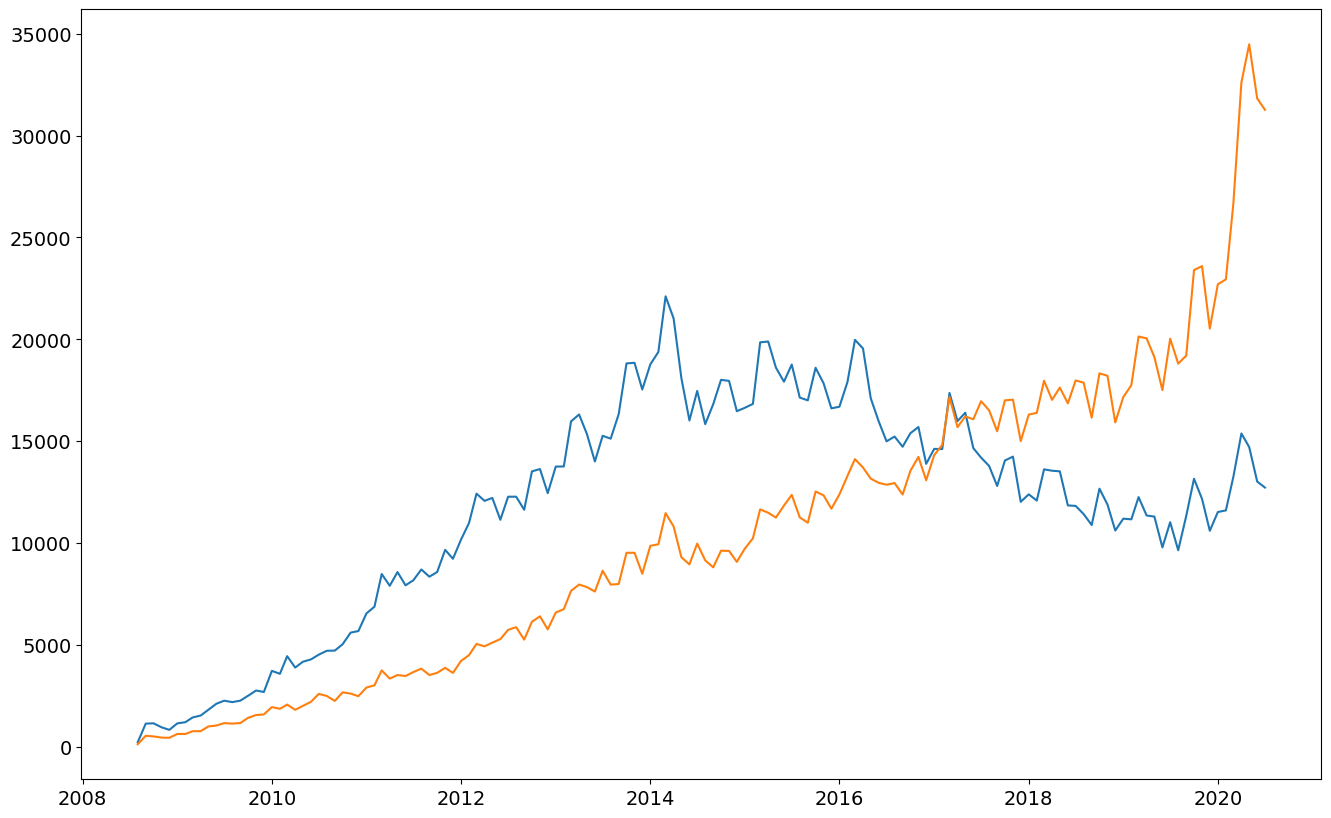

In [50]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df[['java','python']])